# Source: https://kaggle.com/uciml/pima-indians-diabetes-database/data

# 1) Preparing the data

## 1.1) Checking the data

In [1]:
#Importing the modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\bcpython\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
#Loading the dataset
df = pd.read_csv('pima-data.csv')

In [3]:
#Checking the shape of the data
df.shape

(768, 10)

In [4]:
#Checking the top 10 rows of the dataset
df.head(10)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3780,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True
5,5,116,74,0,0,25.6,0.201,30,0.0000,False
6,3,78,50,32,88,31.0,0.248,26,1.2608,True
7,10,115,0,0,0,35.3,0.134,29,0.0000,False
8,2,197,70,45,543,30.5,0.158,53,1.7730,True
9,8,125,96,0,0,0.0,0.232,54,0.0000,True


In [5]:
# Checking for null values
df.isnull().values.any()

False

In [6]:
#Identifying the correlation between the features

def plot_corr(df,size =16):
    corr = df.corr()
    fig, ax = plt.subplots(figsize = (size,size))
    matrix = ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    fig.colorbar(matrix)

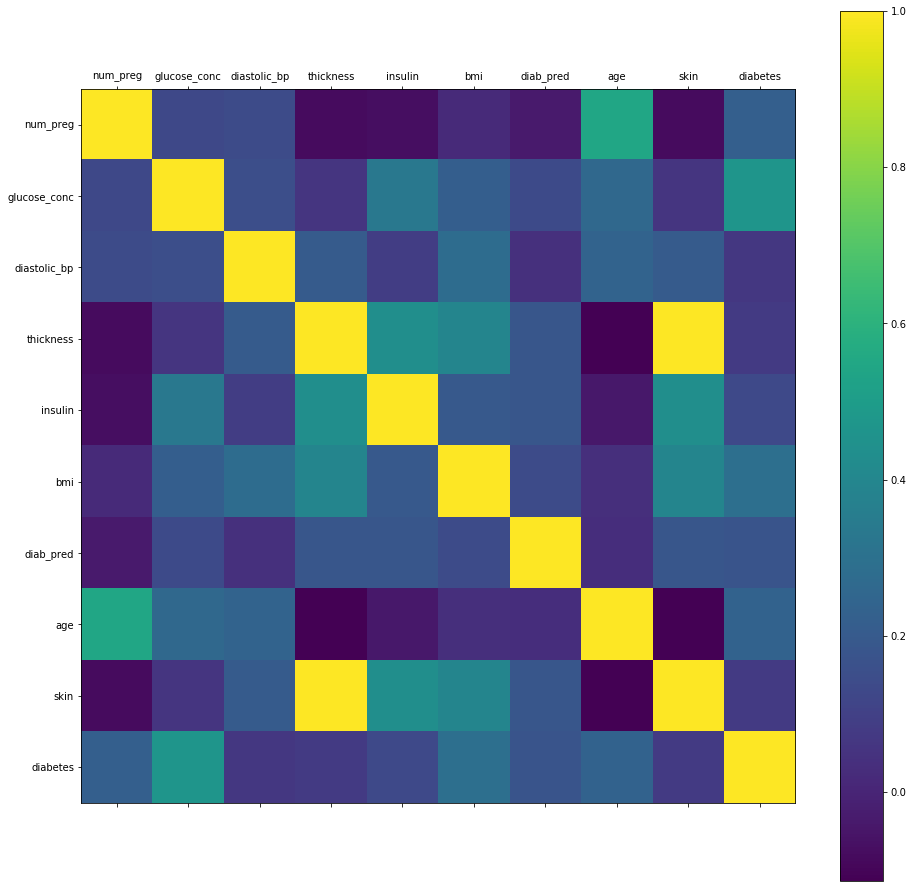

In [7]:
#Plotting the correlation
plot_corr(df)

In [8]:
#Visualizing the correlation on a table
# +1 -> strong positive correlation, 0 -> no correlation , -1 -> strong negative correlation
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081673,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057326,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436785,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392574,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183927,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113973,0.238356
skin,-0.081673,0.057326,0.207371,1.000000,0.436785,0.392574,0.183927,-0.113973,1.000000,0.074750
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074750,1.000000


## 1.2) Mapping the data

In [9]:
#Defining the classes
diabetes_map = {True: 1, False: 0}

In [10]:
#Applying the mapping to the dataset
df['diabetes'] = df['diabetes'].map(diabetes_map)
df.head(10)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3780,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1
5,5,116,74,0,0,25.6,0.201,30,0.0000,0
6,3,78,50,32,88,31.0,0.248,26,1.2608,1
7,10,115,0,0,0,35.3,0.134,29,0.0000,0
8,2,197,70,45,543,30.5,0.158,53,1.7730,1
9,8,125,96,0,0,0.0,0.232,54,0.0000,1


In [11]:
#Checking how the data is distributed
num_true = len(df.loc[df['diabetes'] == True])
num_false = len(df.loc[df['diabetes'] == False])
print(f"Number of true cases: {num_true:} ({num_true/(num_true + num_false)*100:.2f})%")
print(f"Number of false cases: {num_false} ({num_false/(num_true + num_false)*100:.2f})%")

Number of true cases: 268 (34.90)%
Number of false cases: 500 (65.10)%


## 1.3) Splitting the data

70% for training and 30% for test

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
#Feature selection
features = ['num_preg','glucose_conc','diastolic_bp','thickness','insulin','bmi','diab_pred','age']

In [14]:
#Feature to be predicted
feat_prev = ['diabetes']

In [15]:
#Creating objects
X = df[features].values
Y = df[feat_prev].values

In [16]:
#Defining the split rate
split_test_size = 0.3

In [17]:
#Creating data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = split_test_size, random_state = 42)

In [18]:
#Printing results
print("{0:0.2f}% on training data".format((len(X_train)/len(df.index))*100))
print("{0:0.2f}% on test data".format((len(X_test)/len(df.index))*100))

69.92% on training data
30.08% on test data


In [19]:
#Checking the split to verify if we have a balance on the "trues" and "falses" (diabetes) on the original, training and test datasets
len_pos_org = len(df.loc[df['diabetes'] == 1])
len_neg_org = len(df.loc[df['diabetes'] == 0])

print(f'Original True: {len_pos_org} ({len_pos_org/(len_pos_org + len_neg_org)*100:.2f}%)')
print(f'Original False: {len_neg_org} ({len_neg_org/(len_pos_org + len_neg_org)*100:.2f}%)')

len_pos_train = len(Y_train[Y_train[:] == 1])
len_neg_train = len(Y_train[Y_train[:] == 0])

print("")
print(f'Training True: {len_pos_train} ({len_pos_train/(len_pos_train + len_neg_train)*100:.2f}%)')
print(f'Training False: {len_neg_train} ({len_neg_train/(len_pos_train + len_neg_train)*100:.2f}%)')

len_pos_test = len(Y_test[Y_test[:] == 1])
len_neg_test = len(Y_test[Y_test[:] == 0])

print("")
print(f'Test True: {len_pos_test} ({len_pos_test/(len_pos_test + len_neg_test)*100:.2f}%)')
print(f'Test False: {len_neg_test} ({len_neg_test/(len_pos_test + len_neg_test)*100:.2f}%)')

Original True: 268 (34.90%)
Original False: 500 (65.10%)

Training True: 188 (35.01%)
Training False: 349 (64.99%)

Test True: 80 (34.63%)
Test False: 151 (65.37%)


## 1.4) Checking for hidden missing values

In [20]:
df.head(1)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.378,1


In [21]:
print(f" Total rows in the df: {(len(df))} ")
print(f" Missing rows glucose_conc: {(len(df.loc[df['glucose_conc'] == 0]))} ")
print(f" Missing rows diastolic_bp: {(len(df.loc[df['diastolic_bp'] == 0]))} ")
print(f" Missing rows thickness: {(len(df.loc[df['thickness'] == 0]))} ")
print(f" Missing rows insulin: {(len(df.loc[df['insulin'] == 0]))} ")
print(f" Missing rows bmi: {(len(df.loc[df['bmi'] == 0]))} ")
print(f" Missing rows diab_pred: {(len(df.loc[df['diab_pred'] == 0]))} ")
print(f" Missing rows age: {(len(df.loc[df['age'] == 0]))} ")
print(f" Missing rows skin: {(len(df.loc[df['skin'] == 0]))} ")

 Total rows in the df: 768 
 Missing rows glucose_conc: 5 
 Missing rows diastolic_bp: 35 
 Missing rows thickness: 227 
 Missing rows insulin: 374 
 Missing rows bmi: 11 
 Missing rows diab_pred: 0 
 Missing rows age: 0 
 Missing rows skin: 227 


## 1.5) Treating missing values - SimpleImputer

Replacing the zeros for the average

In [22]:
from sklearn.impute import SimpleImputer

In [23]:
#Creating the object
fill_0 = SimpleImputer(missing_values = 0, strategy = 'mean')

#Replacing the zeros for the average of the feature
X_train = fill_0.fit_transform(X_train) 
X_test = fill_0.fit_transform(X_test)

In [24]:
X_train

array([[  1.        ,  95.        ,  60.        , ...,  23.9       ,
          0.26      ,  22.        ],
       [  5.        , 105.        ,  72.        , ...,  36.9       ,
          0.159     ,  28.        ],
       [  4.34056399, 135.        ,  68.        , ...,  42.3       ,
          0.365     ,  24.        ],
       ...,
       [ 10.        , 101.        ,  86.        , ...,  45.6       ,
          1.136     ,  38.        ],
       [  4.34056399, 141.        ,  72.24131274, ...,  42.4       ,
          0.205     ,  29.        ],
       [  4.34056399, 125.        ,  96.        , ...,  22.5       ,
          0.262     ,  21.        ]])

# 2) Building and training the model

In [25]:
#Importing a naive bayes classifier
from sklearn.naive_bayes import GaussianNB

In [26]:
#Creating the predictive model
model_v1 = GaussianNB()

In [27]:
#Training the model
model_v1.fit(X_train, Y_train.ravel())

GaussianNB()

# 3) Model Evaluation

## 3.1) Checking the accuracy of the model on the training data

In [28]:
from sklearn import metrics

In [29]:
#The accuracy is the amount of correct predictions by the trained model -> compares the predicted Y with the original Y
nb_predict_train = model_v1.predict(X_train)
print(f" Accuracy: {metrics.accuracy_score(Y_train,nb_predict_train):.4f}")

 Accuracy: 0.7542


## 3.2) Checking the accuracy of the model on the test data

In [30]:
#The accuracy its supposed to be lower in the test data comparised to the train data as the model hadn't had contact with these test values yet
nb_predict_test = model_v1.predict(X_test)
print(f" Accuracy: {metrics.accuracy_score(Y_test,nb_predict_test):.4f}")

 Accuracy: 0.7359


## 3.3) Metrics

In [31]:
#Creating a confusion matrix and Classification report

print('Confusion matrix')
print(f" {metrics.confusion_matrix(Y_test, nb_predict_test, labels = [1,0])}")

print('')
print('Classification Report')
print(metrics.classification_report(Y_test, nb_predict_test, labels = [1,0]))

Confusion matrix
 [[ 52  28]
 [ 33 118]]

Classification Report
              precision    recall  f1-score   support

           1       0.61      0.65      0.63        80
           0       0.81      0.78      0.79       151

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



## 3.4) Optimizing model with RandomForest

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
model_v2 = RandomForestClassifier()
model_v2.fit(X_train, Y_train.ravel())

RandomForestClassifier()

In [34]:
#Checking the accuracy on test data
rf_predict_test = model_v2.predict(X_test)
print(f' Accuracy: {metrics.accuracy_score(Y_test,rf_predict_test):.4f}')

 Accuracy: 0.7619


In [35]:
#Creating a confusion matrix and Classification report

print('Confusion matrix')
print("{0}".format(metrics.confusion_matrix(Y_test, rf_predict_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(Y_test, rf_predict_test, labels = [1, 0]))

Confusion matrix
[[ 53  27]
 [ 28 123]]

Classification Report
              precision    recall  f1-score   support

           1       0.65      0.66      0.66        80
           0       0.82      0.81      0.82       151

    accuracy                           0.76       231
   macro avg       0.74      0.74      0.74       231
weighted avg       0.76      0.76      0.76       231



## 3.5) Optimizing model with Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
model_v3 = LogisticRegression(C = 0.7)
model_v3.fit(X_train, Y_train.ravel())
lr_predict_test = model_v3.predict(X_test)

C:\Users\bcpython\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [38]:
print(f'Accuracy: {metrics.accuracy_score(Y_test, lr_predict_test):.4f}')
print('')
print('Classification Report')
print(metrics.classification_report(Y_test,lr_predict_test))

Accuracy: 0.7489

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       151
           1       0.65      0.60      0.62        80

    accuracy                           0.75       231
   macro avg       0.72      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231



### Accuracy of the Models:
### Model 1 (Naive Bayes Algorithm) - 73,59%
### Model 2 (Random Forrest Algorithm) - 72,73%
### Model 3 (Logistic Regression Algorithm) - 74,89%

# 4) Making predictions with the trained model

In [39]:
import pickle
import random as random

In [40]:
#Saving the model
filename = 'trained_model.sav'
pickle.dump(model_v3,open(filename,'wb'))

In [41]:
#Loading the model and predicting the output with some random inputs from a new dataset (test_dataset)
# 0 -> no diabetes, 1 -> diabetes
rand1 = random.randint(0,230)
rand2 = random.randint(0,230)
rand3 = random.randint(0,230)

loaded_model = pickle.load(open(filename, 'rb'))
result1 = loaded_model.predict(X_test[rand1].reshape(1,-1))
print(f'\nRandom Input 1 -> Sample nº {rand1}:')
print(result1)
print('')

result2 = loaded_model.predict(X_test[rand2].reshape(1,-1))
print(f'\nRandom Input 2 -> Sample nº {rand2}:')
print(result2)
print('')

result3 = loaded_model.predict(X_test[rand3].reshape(1,-1))
print(f'\nRandom Input 3 - > Sample nº  {rand3}:')
print(result3)
print('')


Random Input 1 -> Sample nº 186:
[0]


Random Input 2 -> Sample nº 222:
[0]


Random Input 3 - > Sample nº  169:
[1]

